In [3]:
import numpy as np
from lib.read_file import C_read, M_read
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
from sklearn.preprocessing import normalize
import lib.preprocess as pp
import matplotlib.pyplot as plt

In [4]:
C = C_read('covtype.data')
M = M_read('MNIST_train.csv')

Loading data for CoverType data...


lib/read_file.py:34: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  C = np.concatenate((CX, Cy.reshape((len(Cy), 1))), axis=1)


done
Loading data for MNIST...


/Users/hsinyangchen/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247

done


In [5]:
#preprocess
M = np.concatenate(normalize(M[:, :-1], norm='l2', axis=0), M[:, -1].reshape((len(M[:, -1]), 1)), axis=1)
C = np.concatenate(normalize(C[:, :-1], norm='l2', axis=0), C[:, -1].reshape((len(C[:, -1]), 1)), axis=1)
M_train, M_test = pp.TTsplit(M)
C_train, C_test = pp.TTsplit(C)

TypeError: function takes at most 2 arguments (3 given)

In [11]:
M_train_sub = pp.getSubset(M_train, 50) #50, 75, 100

(15750, 785)

k = 1, score = 0.942286
k = 2, score = 0.931937
k = 3, score = 0.944127
k = 4, score = 0.942222
k = 5, score = 0.942984
k = 6, score = 0.941206
k = 7, score = 0.940190
k = 8, score = 0.938476
k = 9, score = 0.938794


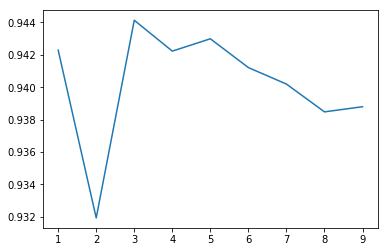

CPU times: user 31min 10s, sys: 13.7 s, total: 31min 24s
Wall time: 31min 45s


In [18]:
%%time
scores = []
K = range(1, 15)
for k in K:
    clf = KNN(n_neighbors=k)
    kf = KFold(n_splits=2)
    score = []
    for train, test in kf.split(M_train_sub):
        clf.fit(M_train_sub[train, :-1], M_train_sub[train, -1])
        score.append(sum(clf.predict(M_train_sub[test, :-1]) == M_train_sub[test, -1])*1.0/len(test))
    scores.append(score)
    print "k = %i, score = %f" %(k, np.mean(scores[-1]))

plt.figure()
plt.plot(K, [np.mean(sc) for sc in scores])
plt.show()

In [ ]:
%%time
scores = []
K = range(1, 15)
for k in K:
    clf = KNN(n_neighbors=k)
    kf = KFold(n_splits=5)
    score = []
    for train, test in kf.split(M_train_sub):
        clf.fit(M_train_sub[train, :-1], M_train_sub[train, -1])
        score.append(sum(clf.predict(M_train_sub[test, :-1]) == M_train_sub[test, -1])*1.0/len(test))
    scores.append(score)
    print "k = %i, score = %f" %(k, np.mean(scores[-1]))

plt.figure()
plt.plot(K, [np.mean(sc) for sc in scores])
plt.show()

In [ ]:
%%time
scores = []
K = range(1, 15)
for k in K:
    clf = KNN(n_neighbors=k)
    loo = LeaveOneOut()
    score = []
    for train, test in loo.split(M_train_sub):
        clf.fit(M_train_sub[train, :-1], M_train_sub[train, -1])
        score.append(sum(clf.predict(M_train_sub[test, :-1]) == M_train_sub[test, -1])*1.0/len(test))
    scores.append(score)
    print "k = %i, score = %f" %(k, np.mean(scores[-1]))

plt.figure()
plt.plot(K, [np.mean(sc) for sc in scores])
plt.show()